Dependecies: Add your Dependencies here

In [187]:
#!pip install dtreeviz
#import dtreeviz

In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
from sklearn import tree
from sklearn.model_selection import cross_val_score
#from dtreeviz.trees import dtreeviz
rcParams['figure.figsize']= 10,10

Read the dataset from the CSV file

In [189]:
dic = {'Serious_Dlq_in_2yrs':0,'Debt_Ratio':0.24,'age':23,'Number_Of_Time_30-59_Days_Past_Due':0,'Number_Of_Time_60-89_Days_Past_Due':0,'Number_Of_Times_90_Days_Late':0,'Monthly_Income':78,'Dependents':0}
data = pd.read_csv('/content/credit_scoring_sample.csv')
data

,Serious_Dlq_in_2yrs,Debt_Ratio,age,Number_Of_Time_30-59_Days_Past_Due,Number_Of_Time_60-89_Days_Past_Due,Number_Of_Times_90_Days_Late,Monthly_Income,Dependents
0,0,454.000000,21,0,0,0,NaN,NaN
1,1,0.174377,22,1,1,1,280.0,0.0
2,0,0.000000,22,0,0,0,1500.0,0.0
3,1,0.000000,23,98,98,98,NaN,0.0
4,1,111.000000,23,0,1,2,NaN,0.0
...,...,...,...,...,...,...,...,...
994,0,0.065758,89,0,0,0,10416.0,0.0
995,0,0.019423,90,0,0,0,3500.0,0.0
996,0,0.173890,91,0,0,0,5767.0,0.0
997,0,32.000000,92,0,0,0,NaN,0.0


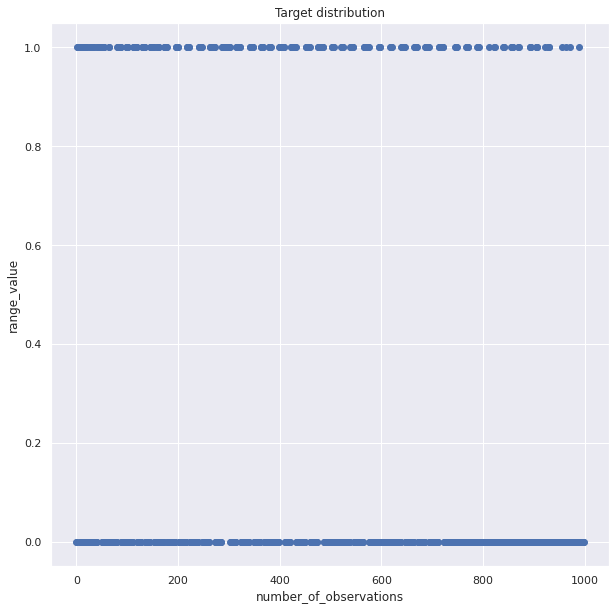

In [190]:
plt.scatter(data.index , data['Serious_Dlq_in_2yrs'])
plt.xlabel("number_of_observations")
plt.ylabel("range_value")
plt.title("Target distribution")


plt.show()

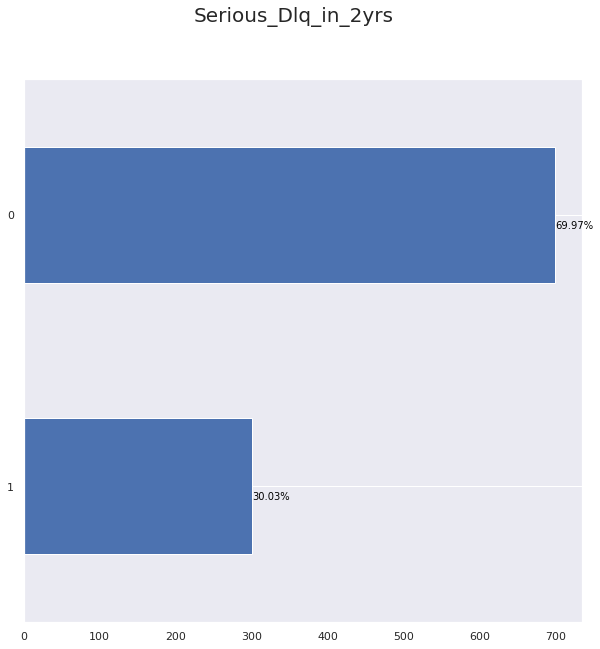

In [191]:
ax = data[ 'Serious_Dlq_in_2yrs'].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle('Serious_Dlq_in_2yrs', fontsize=20)
plt.show()

In [192]:
data[['Serious_Dlq_in_2yrs']].sum()

Serious_Dlq_in_2yrs    300
dtype: int64

In [193]:
data[['Dependents']].describe()

,Dependents
count,976.000000
mean,0.780738
std,1.125498
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,8.000000


In [194]:
data.isna().sum()

Serious_Dlq_in_2yrs                     0
Debt_Ratio                              0
age                                     0
Number_Of_Time_30-59_Days_Past_Due      0
Number_Of_Time_60-89_Days_Past_Due      0
Number_Of_Times_90_Days_Late            0
Monthly_Income                        186
Dependents                             23
dtype: int64

In [195]:
# Handle the NaN values
data.fillna(data.mean(), inplace=True)
data.isna().sum()

Serious_Dlq_in_2yrs                   0
Debt_Ratio                            0
age                                   0
Number_Of_Time_30-59_Days_Past_Due    0
Number_Of_Time_60-89_Days_Past_Due    0
Number_Of_Times_90_Days_Late          0
Monthly_Income                        0
Dependents                            0
dtype: int64

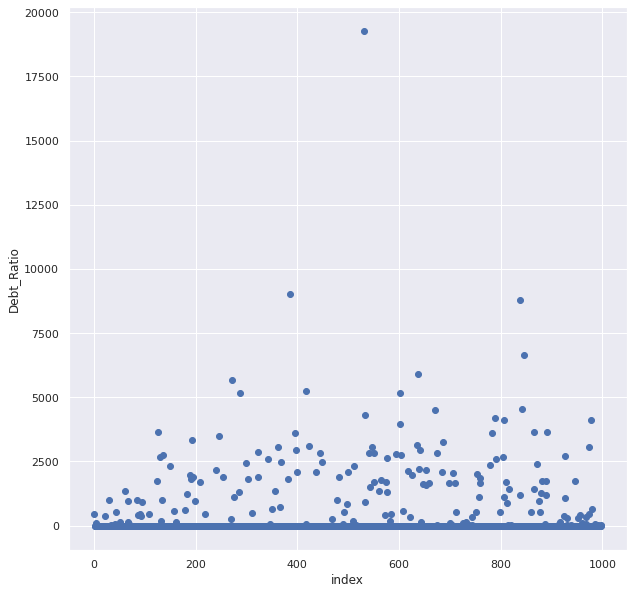

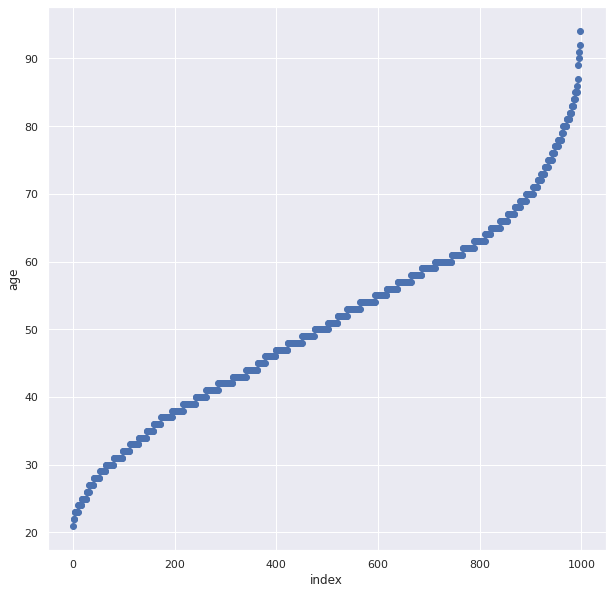

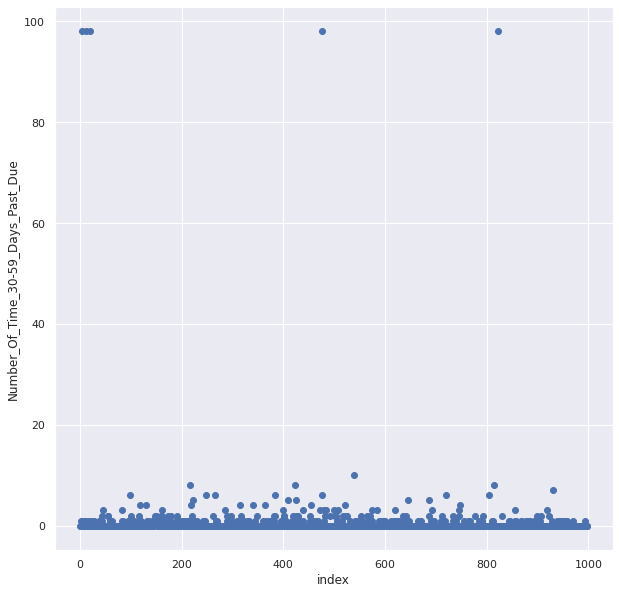

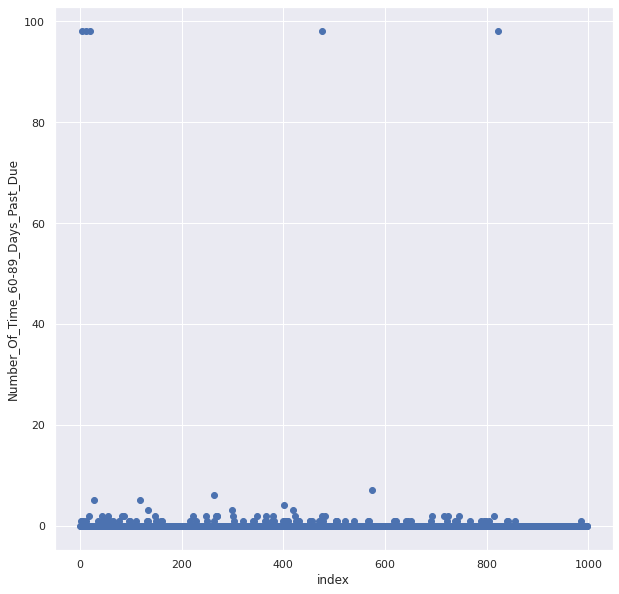

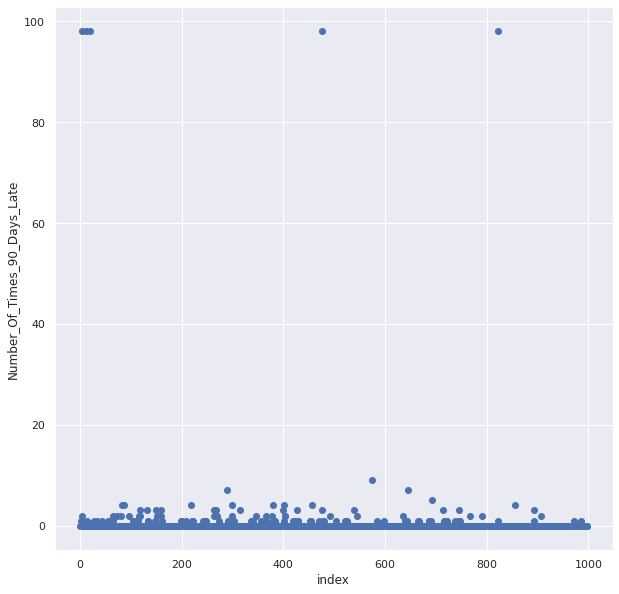

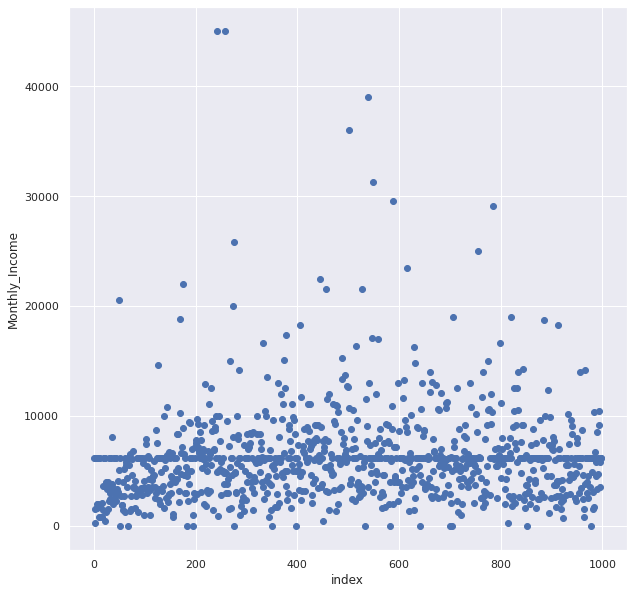

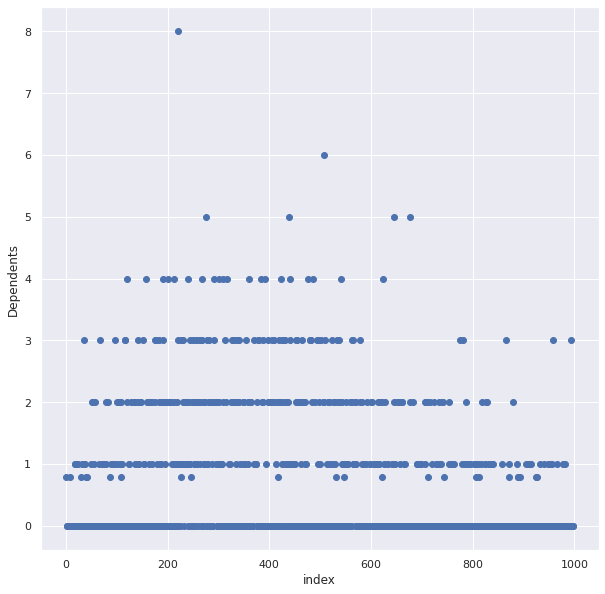

In [196]:
# Visualize the distribution of data for every feature
for x in data.columns:
  if x != "Serious_Dlq_in_2yrs":
    plt.xlabel("index")
    plt.ylabel(x)
    plt.scatter(data.index,data[x])
    plt.show()
    print('\n')

Train the Random Forest Classifier

In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [198]:
# seperate depedendent and independent variables from the dataset
X = data.iloc[:,1:].values #indep.
y = data.iloc[:,0:1].values #dep.
#feature_names = X.columns
#labels = y.unique()

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [199]:
f = data.columns
f[1:]

Index(['Debt_Ratio', 'age', 'Number_Of_Time_30-59_Days_Past_Due',
       'Number_Of_Time_60-89_Days_Past_Due', 'Number_Of_Times_90_Days_Late',
       'Monthly_Income', 'Dependents'],
      dtype='object')

In [200]:
# define paramerts for the random forest
parameters = {'max_features': [1, 2, 4], 'max_depth': [2,3,4,5]}
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=42, 
                            class_weight='balanced')
#rf.fit(X_train,y_train)

In [201]:
#plt.figure(figsize=(20,20))
#_ = tree.plot_tree(rf.estimators_[0], feature_names=f, filled=True)

In [202]:
#viz = dtreeviz(rf.estimators_[0], X, y, feature_names= [str(x) for x in feature_names], target_name= str(labels))
#viz.view()

In [203]:
print(y)

[[0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]


In [204]:
# perform cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
#skf.split(X,y)
lst_accu_stratified=[]
for train_index, test_index in skf.split(X, y):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf.fit(X_train, y_train.ravel())
    lst_accu_stratified.append(rf.score(X_test, y_test))
lst_accu_stratified

[0.78, 0.805, 0.79, 0.77, 0.7839195979899497]

In [205]:
grid_search = GridSearchCV(rf, parameters, n_jobs=-1, scoring='roc_auc', cv=skf)
grid_search.fit(X_train, y_train.ravel()) 

print(grid_search.best_params_)

{'max_depth': 3, 'max_features': 2}


In [206]:
#from sklearn import metrics
#cv_scores_rf = cross_val_score(rf, X_train, y_train.ravel(), cv=5)
#cv_scores_rf

In [207]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (cv_scores_rf.mean(), cv_scores_rf.std()))

0.49 accuracy with a standard deviation of 0.13


In [208]:
#Get the best score from the grid search
print(grid_search.best_score_) 

0.8204427083333334


In [209]:
clf = grid_search.best_estimator_
clf.fit(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=3, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [210]:
clf.score(X_test,y_test)

0.8592964824120602

In [211]:
a = clf.predict(X_test[2:3,:])

print(a, y_test[2:3,:])

[1] [[1]]


In [212]:
# from sklearn.datasets import make_friedman1
# from sklearn.ensemble import GradientBoostingRegressor
# X, y = make_friedman1()
# clf = GradientBoostingRegressor(n_estimators=10).fit(X, y)
# plot_partial_dependence(clf, X, [0, 1,2]) 
# y

In [213]:
grid_search.cv_results_

{'mean_fit_time': array([0.2787899 , 0.2771914 , 0.26633677, 0.26754279, 0.25977507,
        0.27475724, 0.26216259, 0.27015347, 0.29018145, 0.27118402,
        0.26958117, 0.31038475]),
 'mean_score_time': array([0.10393076, 0.10414171, 0.10454583, 0.10395927, 0.1042058 ,
        0.10503554, 0.10439229, 0.10440464, 0.10370569, 0.10426769,
        0.10446796, 0.10346622]),
 'mean_test_score': array([0.81047247, 0.81640625, 0.81497396, 0.81577381, 0.82044271,
        0.81616443, 0.80907738, 0.8171131 , 0.81584821, 0.8093378 ,
        0.81776414, 0.81052827]),
 'param_max_depth': masked_array(data=[2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[1, 2, 4, 1, 2, 4, 1, 2, 4, 1, 2, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False, 

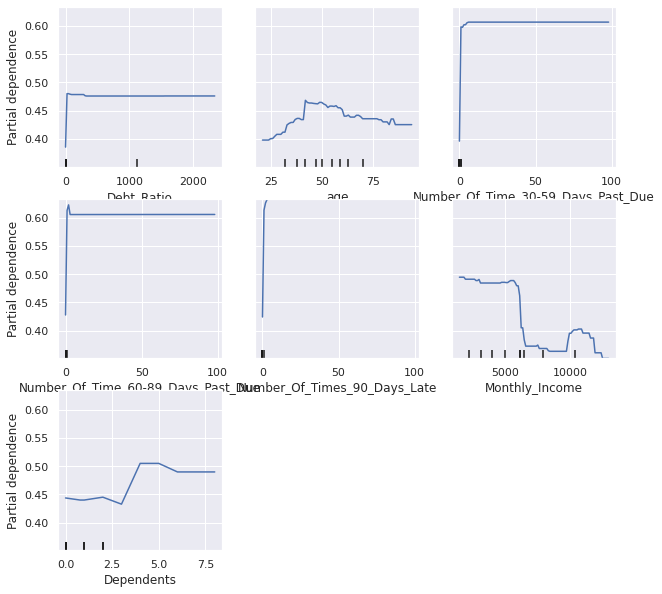

In [214]:
# Find the feature which has the weakest impact in Random Forest Model
from sklearn.inspection import plot_partial_dependence
features = [0,1,2,3,4,5,6]
plot_partial_dependence(clf,X,features,feature_names= f[1:])

In [215]:
pd.DataFrame({'feat': f[1:],
              'coef': grid_search.best_estimator_.feature_importances_}).sort_values(by='coef', ascending=True)


,feat,coef
6,Dependents,0.046395
1,age,0.078514
0,Debt_Ratio,0.133376
3,Number_Of_Time_60-89_Days_Past_Due,0.154407
5,Monthly_Income,0.160277
4,Number_Of_Times_90_Days_Late,0.181149
2,Number_Of_Time_30-59_Days_Past_Due,0.245881


            Coefficient
Dependents     0.046395
 


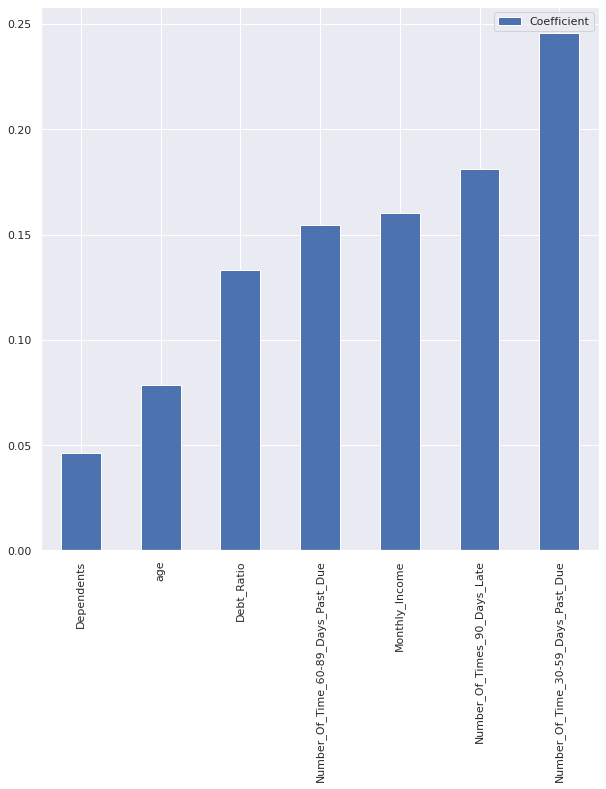

In [216]:
#graph for the displaying the weakest impact feature
rf_feature = pd.DataFrame({'Coefficient': grid_search.best_estimator_.feature_importances_},index=f[1:]).sort_values(by='Coefficient',ascending=True)
print(rf_feature[rf_feature['Coefficient']==min(grid_search.best_estimator_.feature_importances_)])
print(" ")
ax = rf_feature.plot.bar()

In [217]:
# Perform bagging classification using decision trees as the base classifier

In [218]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier

base_cls = DecisionTreeClassifier()

In [219]:
from sklearn.ensemble import BaggingClassifier

parameters_bg = {'n_estimators':[2,3,4]}
#bagging_grid_search = 0

In [220]:
# get a list of models to evaluate
def get_models():
	# write your code here
  param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}
  model1 = GridSearchCV(BaggingClassifier(base_estimator = base_cls,n_estimators=2,bootstrap=True),param_grid, scoring = 'roc_auc')
  model2= GridSearchCV(BaggingClassifier(base_estimator = base_cls,n_estimators=3,bootstrap=True),param_grid, scoring = 'roc_auc')
  model3= GridSearchCV(BaggingClassifier(base_estimator = base_cls,n_estimators=4,bootstrap=True),param_grid, scoring = 'roc_auc')
  models = [model1,model2,model3]
  return models

In [221]:
#Perform 5 fold cross-validation using ROC AUC metric
c=get_models()
global bagging_grid_search 
#for i in range(0,3)
bagging_grid_search = GridSearchCV(BaggingClassifier(), parameters_bg, n_jobs=-1, scoring='roc_auc', cv=skf, verbose=False)
bagging_grid_search = bagging_grid_search.fit(X_train,y_train.ravel())
print(bagging_grid_search)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
             error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimators': [2, 3, 4]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='roc_auc',
             verbose=False)


In [222]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  # write your code here
  scores=cross_val_score(model, X, y)
  return scores


In [223]:
c

[GridSearchCV(cv=None, error_score=nan,
              estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                            

 
THE SCORE FINDED USING CROSS VALIDATION FOR MODEL: 1
[0.68517485 0.65736607 0.71577381 0.73725818 0.7468378 ]
----------------------------------------------


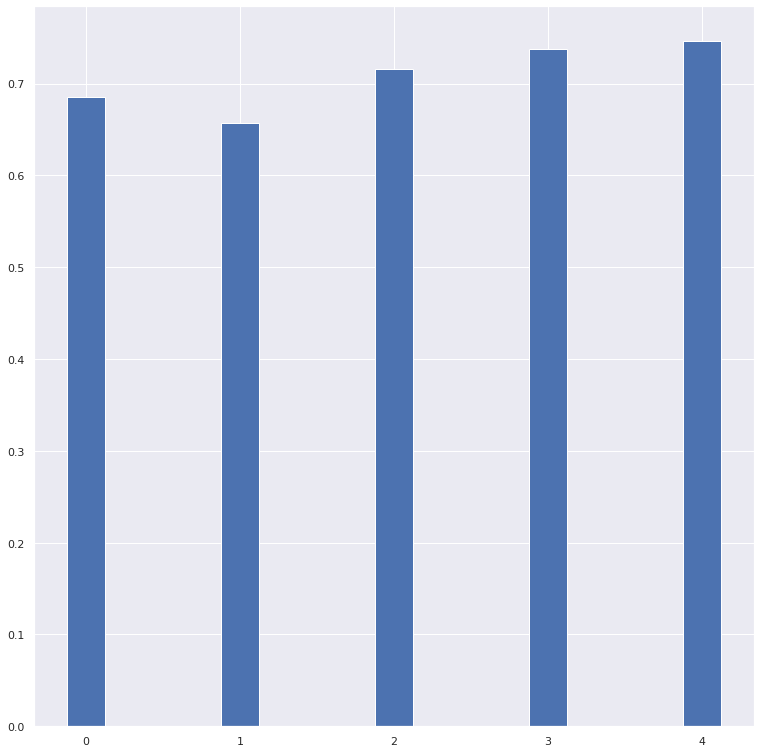

**************************************************************************************
 
 
 
THE SCORE FINDED USING CROSS VALIDATION FOR MODEL: 2
[0.65708705 0.69652158 0.73688616 0.74032738 0.72330729]
----------------------------------------------


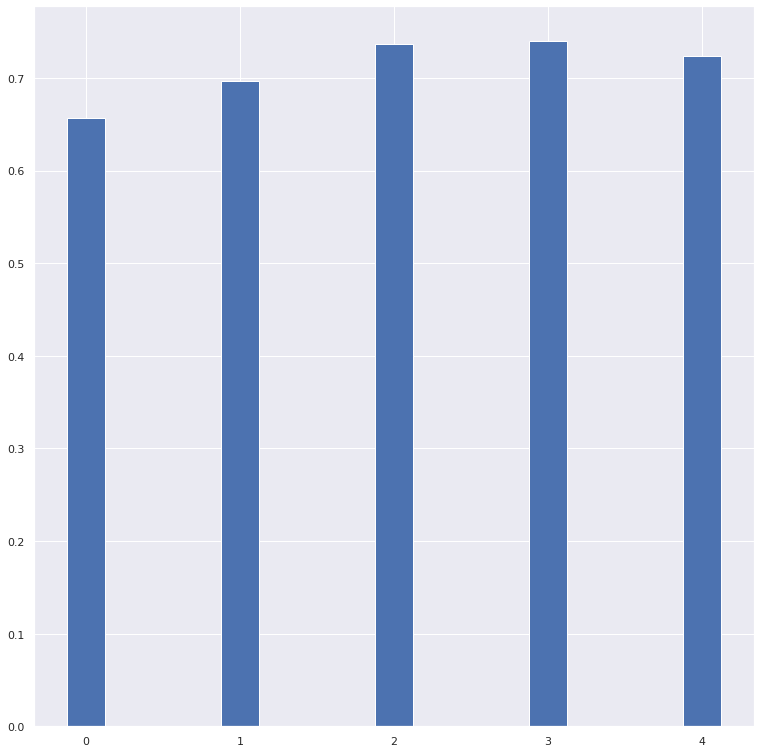

**************************************************************************************
 
 
 
THE SCORE FINDED USING CROSS VALIDATION FOR MODEL: 3
[0.72600446 0.80738467 0.73967634 0.65178571 0.59551711]
----------------------------------------------


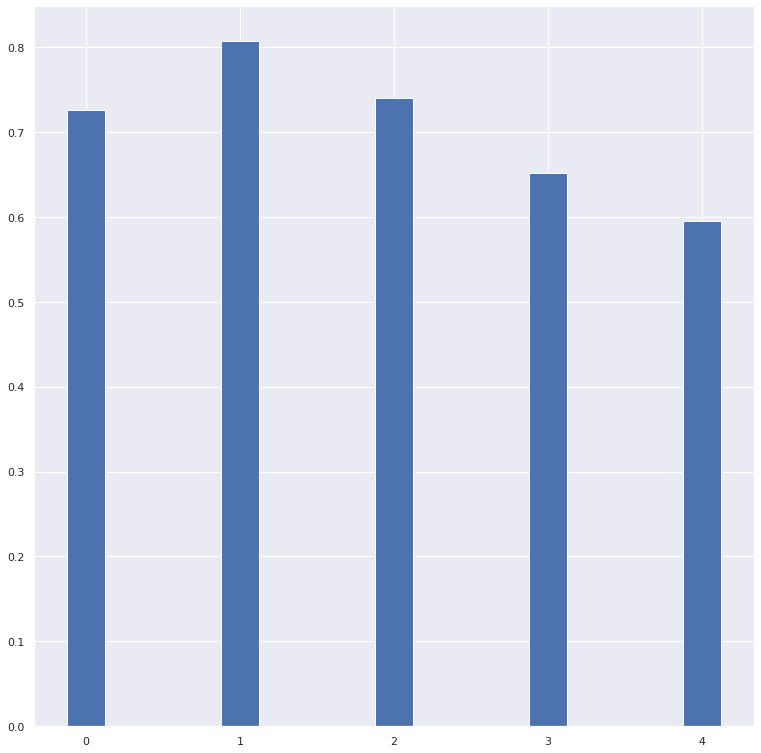

**************************************************************************************
 
 


In [224]:
score_model = []
for i in range(0,3):
  print(" ")
  print("THE SCORE FINDED USING CROSS VALIDATION FOR MODEL:",i+1)
  score_m = evaluate_model(c[i],X_train,y_train.ravel())
  print(score_m)
  score_model.append(score_m)
  print("----------------------------------------------")
  
  X_plot = np.arange(5)
  fig_v = plt.figure()
  ax_v = fig_v.add_axes([0,0,1,1])
  ax_v.bar(X_plot + 0.00,score_m, color = 'b', width = 0.25)
  plt.show()
  print("**************************************************************************************")
  print(" ")
  print(" ")

In [225]:
# Summarize the performance by getting mean and standard deviation of scores
for i in range(0,3):
  print("MODEL:",i+1)
  print("---------------------")
  print("THE ACCURACY OR MEAN FOR CV SCORE = ",score_model[i].mean()*100)
  print("THE STANDARD DEVIATION FOR CV SCORE = ",score_model[i].std()*100)

MODEL: 1
---------------------
THE ACCURACY OR MEAN FOR CV SCORE =  70.84821428571428
THE STANDARD DEVIATION FOR CV SCORE =  3.3191769558490987
MODEL: 2
---------------------
THE ACCURACY OR MEAN FOR CV SCORE =  71.08258928571428
THE STANDARD DEVIATION FOR CV SCORE =  3.0976561997355736
MODEL: 3
---------------------
THE ACCURACY OR MEAN FOR CV SCORE =  70.40736607142858
THE STANDARD DEVIATION FOR CV SCORE =  7.340330976218798


THE CV SCOREES FOR MODEL : 1
********************************
[0.68517485 0.65736607 0.71577381 0.73725818 0.7468378 ]
 
THE CV SCOREES FOR MODEL : 2
********************************
[0.65708705 0.69652158 0.73688616 0.74032738 0.72330729]
 
THE CV SCOREES FOR MODEL : 3
********************************
[0.72600446 0.80738467 0.73967634 0.65178571 0.59551711]
 


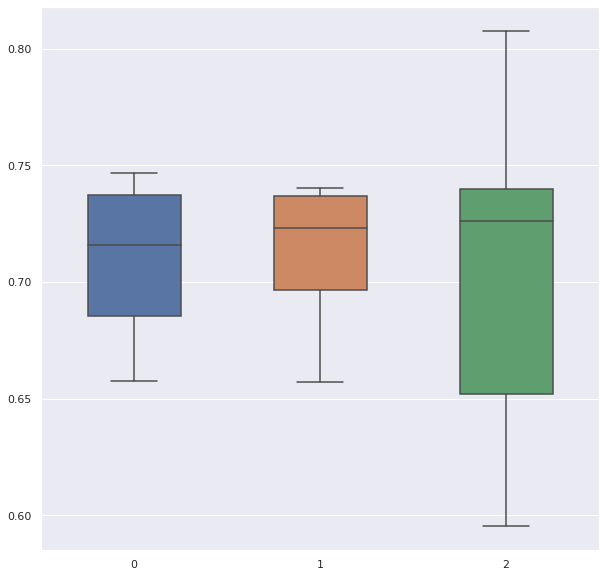

In [226]:
# Plot the model performance for comparison using boxplot
sns.boxplot(data = score_model,width=0.5,fliersize=5)
sns.set(rc={'figure.figsize':(2,15)})
for i in range(0,3):
  print("THE CV SCOREES FOR MODEL :",i+1)
  print("********************************")
  print(score_model[i])
  print(" ")

In [227]:
#for i in range(0,3):
    #bagging_grid_search = GridSearchCV(model[i], parameters_bg, n_jobs=-1, scoring='roc_auc', cv=skf, verbose=True)
    #bagging_grid_search = bagging_grid_search.fit(X,y)
num_estimators =bagging_grid_search.best_params_['n_estimators']
print(num_estimators)

4


THE BEST CV SCORE ARRAY FOR BAGGING MODEL: [0.72600446 0.80738467 0.73967634 0.65178571 0.59551711]
********************************************************************************************************
THE CV SCORE ARRAY FOR RANDOM FOREST MODEL: [0.78, 0.805, 0.79, 0.77, 0.7839195979899497]


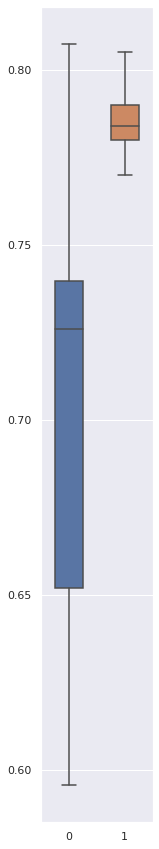

In [228]:
# Compare the best performance of bagging with random forest
results_bag_rf=[]
num_est =[2,3,4]
index = num_est.index(num_estimators)
results_bag_rf= [score_model[index]]
results_bag_rf.append(lst_accu_stratified)
sns.boxplot( data = results_bag_rf, width = 0.5, fliersize= 5)
sns.set(rc={'figure.figsize':(2,15)})
print("THE BEST CV SCORE ARRAY FOR BAGGING MODEL:",results_bag_rf[0])
print("********************************************************************************************************")
print("THE CV SCORE ARRAY FOR RANDOM FOREST MODEL:",results_bag_rf[1])

References:-


*   [Decision Tree](https://https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
*   [Seaborn](https://https://https://seaborn.pydata.org/)
*   [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
*   [Stratified Kfold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)
*   [Grid Search](https://https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
*   [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) 
*   [Cross Val Score](https://https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)









